In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assignment1
!ls WHR-2024-5CS037.csv

Mounted at /content/drive
/content/drive/MyDrive/Assignment1
WHR-2024-5CS037.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:

•Dataset Overview:

1. Load the dataset and display the first 10 rows.

In [3]:
df = pd.read_csv('WHR-2024-5CS037.csv')
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [4]:
print("Number of row and column: ",df.shape)

Number of row and column:  (143, 9)


3. List all the columns and their data types.

In [5]:
columns_with_datatype = list(zip(df.columns, df.dtypes))
display(columns_with_datatype)

[('Country name', dtype('O')),
 ('score', dtype('float64')),
 ('Log GDP per capita', dtype('float64')),
 ('Social support', dtype('float64')),
 ('Healthy life expectancy', dtype('float64')),
 ('Freedom to make life choices', dtype('float64')),
 ('Generosity', dtype('float64')),
 ('Perceptions of corruption', dtype('float64')),
 ('Dystopia + residual', dtype('float64'))]

• Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.

In [6]:
#Calculate mean, median and standard deviation
Mean = df['score'].mean()
Median = df['score'].median()
Standard_deviation = df['score'].std()
print(f"Mean: {Mean:.2f}")
print(f"Median: {Median:.2f}")
print(f"Standard Deviation: {Standard_deviation:.2f}")


Mean: 5.53
Median: 5.79
Standard Deviation: 1.17


2. Identify the country with the highest and lowest happiness scores.

In [7]:
#
high_happiness_score = df['Country name'][df['score']. idxmax()]
low_happiness_score = df['Country name'][df['score'].idxmin()]
print("The country with highest happiness score is: ", high_happiness_score)
print("The country with lowest happiness score is: ", low_happiness_score)

The country with highest happiness score is:  Finland
The country with lowest happiness score is:  Afghanistan


• Missing Values:

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [8]:
#Check and count the missing value
missing_value = df.isnull().sum()
#Display the result
display("Missing values in dataset: ", missing_value)

'Missing values in dataset: '

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


• Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [9]:
high_score_nations = df[df['score']>7.5]
display("Countries with a score greater than 7.5: ",high_score_nations)

'Countries with a score greater than 7.5: '

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [10]:
# Sort by 'GDP per Capita' in descending order and select the top 10 rows
top_10_gdp = high_score_nations.sort_values(by='Log GDP per capita', ascending=False).head(10)

# Display the top 10 rows
display(top_10_gdp)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:

1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

  Low − (Score < 4)

  Medium − (4 ≤ Score ≤ 6)

  High − (Score > 6)

In [11]:
def Happiness_Category(score):
  if score<4:
    return'Low'
  elif score>=4 and score<=6:
    return 'Medium'
  else:
    return 'High'

df['Happiness Category'] = df['score'].apply(Happiness_Category)
display(df)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

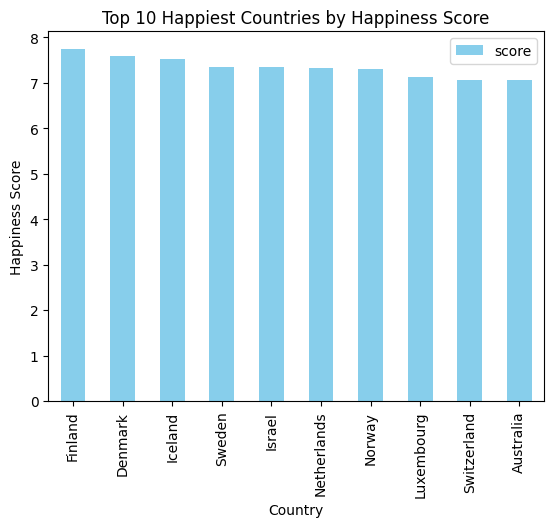

In [12]:
# Sort the dataset by Happiness Score in descending order and select the top 10 rows
top_10_happiest = df.nlargest(10, 'score')

# Create a bar plot
top_10_happiest.plot(kind = 'bar' , x = 'Country name', y = 'score', color = 'skyblue')

# Add titles and labels
plt.title('Top 10 Happiest Countries by Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

# Display the plot
plt.show()


• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

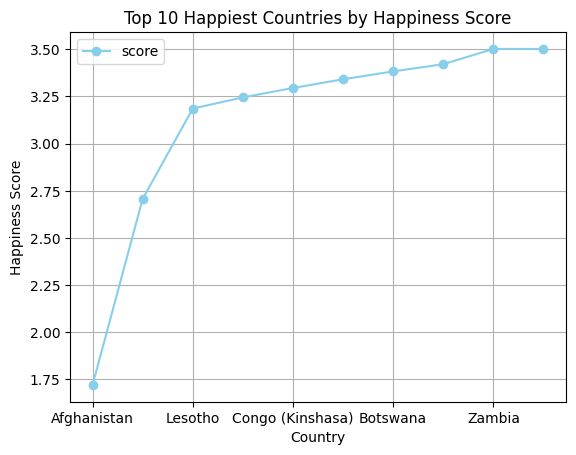

In [13]:
# Sort the dataset by Happiness Score in descending order and select the top 10 rows
top_10_unhappiest = df.nsmallest(10, 'score')

# Create a bar plot
top_10_unhappiest.plot(kind = 'line' , x = 'Country name', y = 'score', marker = 'o', color = 'skyblue')

# Add titles and labels
plt.title('Top 10 Happiest Countries by Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

# Display the plot
plt.grid()
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.

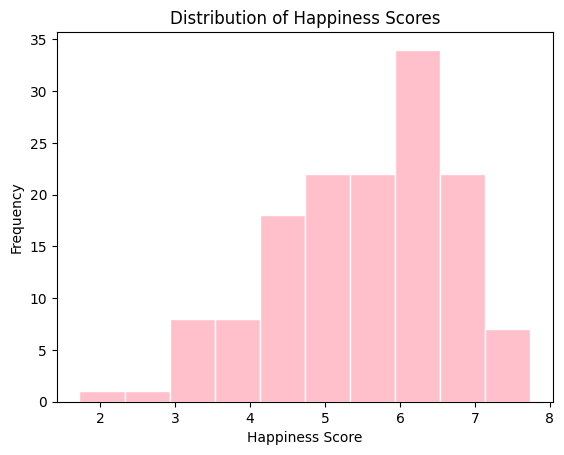

In [14]:
df['score'].plot(kind ='hist', edgecolor = 'white', color = 'pink')
#Set the title
plt.title('Distribution of Happiness Scores')

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

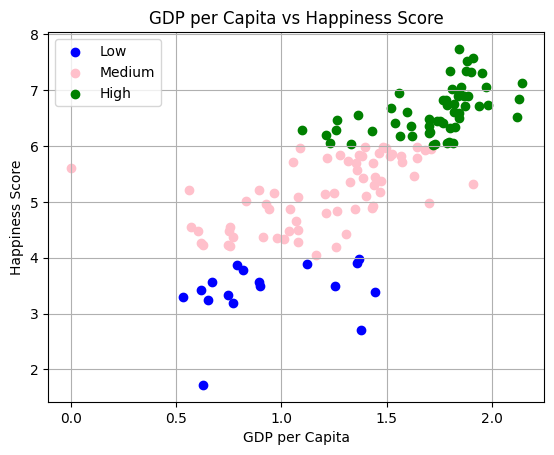

In [15]:
categories = {'Low': 'blue','Medium':'pink','High':'green'}
for category, color in categories.items():
  subset = df[df['Happiness Category'] == category]
  plt.scatter(subset['Log GDP per capita'], subset['score'],label= category, color=color)
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.grid()
plt.legend()
plt.show()

Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [33]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asian_filtered = df[df['Country name'].isin(south_asian_countries)]
display(south_asian_filtered)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


3. Save the filtered dataframe as separate CSV files for future use.

In [34]:
south_asian_filtered.to_csv('south_asian_countries.csv', index=False)

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [36]:
south_asian_filtered.loc[:,'Composite Score']=(0.40* south_asian_filtered['Log GDP per capita'])+(0.30* south_asian_filtered['Social support'])+(0.30* south_asian_filtered['Healthy life expectancy'])
display(south_asian_filtered)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


2. Rank the South Asian countries based on the Composite Score in descending order.

In [37]:
filtered_dataset_sorted= south_asian_filtered.sort_values(by='Composite Score', ascending=False)
display(filtered_dataset_sorted)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

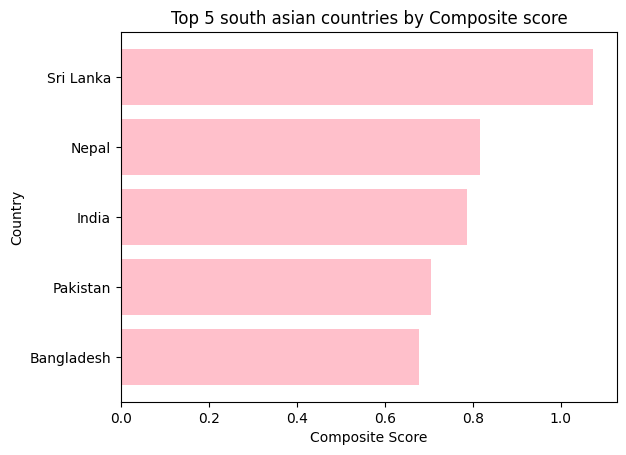

In [20]:
top_5_countries = filtered_dataset_sorted.head(5)
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='pink')
plt.title('Top 5 south asian countries by Composite score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

Ans: The ranking based on composite score and original score doesn't align with each other closely. Composite score is based on factors like GDP, social support, healthy life expectancy whereas Original score is based on overall well-being of a community. Happiness cannot be measured just by economic progress but also by factors like Kindess, Generosity, Freedom, etc.

#Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.

In [38]:
#Calculate the first and third quartile for 'score'
Q1_score = south_asian_filtered['score'].quantile(0.25)
Q3_score = south_asian_filtered['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asian_filtered['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_filtered['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp- Q1_gdp

score_outliers = south_asian_filtered[(south_asian_filtered['score'] < Q1_score - 1.5 * IQR_score) | (south_asian_filtered['score'] > Q3_score + 1.5 * IQR_score)]
gdp_outliers = south_asian_filtered[(south_asian_filtered['Log GDP per capita'] < (Q1_gdp - 1.5 * IQR_gdp)) | (south_asian_filtered['Log GDP per capita'] > (Q3_gdp + 1.5 * IQR_gdp))]

outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()
display(outliers)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

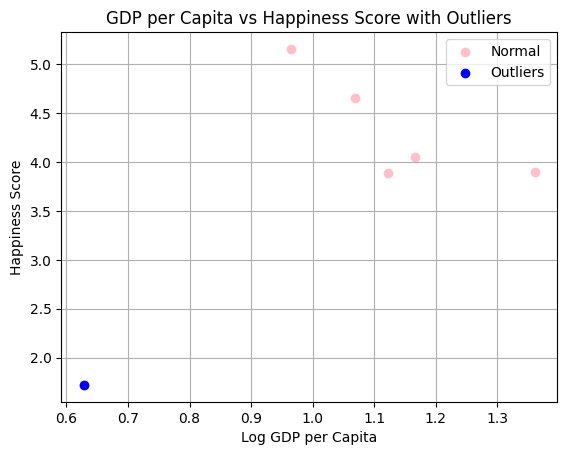

In [39]:
plt.scatter(south_asian_filtered['Log GDP per capita'], south_asian_filtered['score'], color='pink', label='Normal')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='blue', label='Outliers')

plt.title('GDP per Capita vs Happiness Score with Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Characteristics of outliers:
- Countries with very high or low GDP or score compared to others

Impact on Regional Averages:
- Outliers causes biasness and inaccuracy in data analysis as a country with higher GDP or low happiness score can increase the average GDP while decreasing the happiness score and vice versa.

#Task - 4 - Exploring Trends Across Metrics:

Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [40]:
freedom_correlation = south_asian_filtered['Freedom to make life choices'].corr(south_asian_filtered['score'], method='pearson')
generosity_correlation = south_asian_filtered['Generosity'].corr(south_asian_filtered['score'], method='pearson')

print(f"Correlation between Freedom to make life choices and Score: {freedom_correlation:.2f}")
print(f"Correlation between Generosity and Score: {generosity_correlation:.2f}")

Correlation between Freedom to make life choices and Score: 0.80
Correlation between Generosity and Score: 0.87


2. Create scatter plots with trendlines for these metrics against the Score.

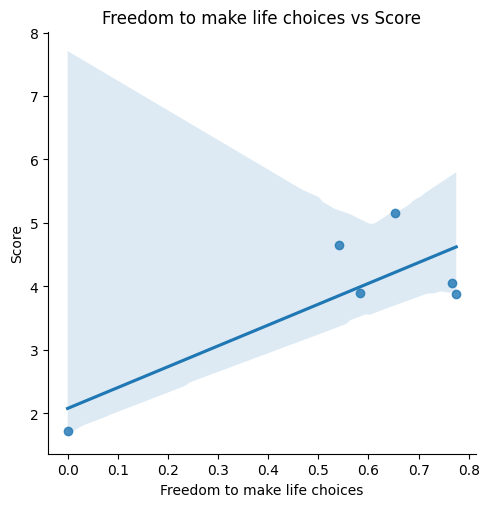

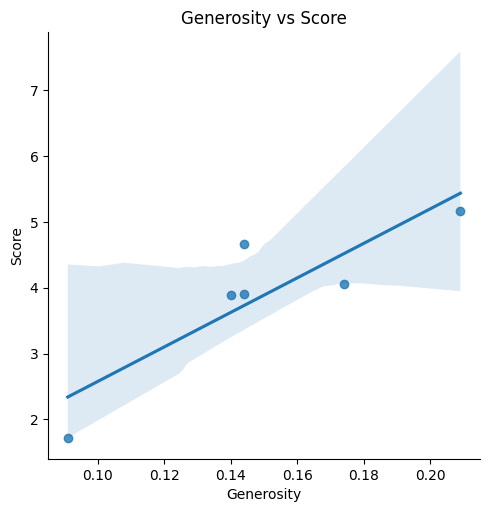

In [41]:
sns.lmplot(data=south_asian_filtered, x='Freedom to make life choices', y='score')
plt.title('Freedom to make life choices vs Score')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.show()

sns.lmplot(data=south_asian_filtered, x='Generosity', y='score')
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Ans: Generosity and freedom to make life choices is being compared on the basis of happiness score. In which , Generosity have strongest relationship with happiness in south asian countries as south asians are fond of those who are willing to help them and are kind.

#Task - 5 - Gap Analysis:

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [44]:
south_asian_filtered.loc[:,'GDP-Score Gap'] = south_asian_filtered['Log GDP per capita'] - south_asian_filtered['score']
display(south_asian_filtered)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [46]:
ascending_gap = south_asian_filtered.sort_values('GDP-Score Gap' , ascending = True)
print("Descending order of GDP-Score Gap:")
display(ascending_gap)

Descending order of GDP-Score Gap:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [48]:
descending_gap = south_asian_filtered.sort_values('GDP-Score Gap' , ascending = False)
display(descending_gap)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

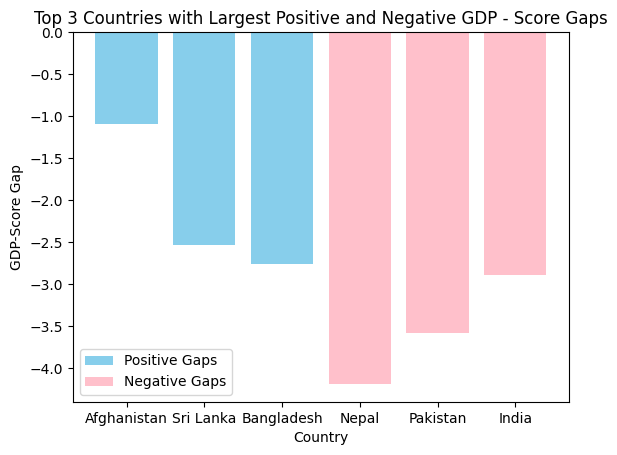

In [51]:
top_positive_gap = descending_gap.head(3)
top_negative_gap = ascending_gap.head(3)
plt.bar(top_positive_gap['Country name'], top_positive_gap['GDP-Score Gap'], color='skyblue', label='Positive Gaps')
plt.bar(top_negative_gap['Country name'], top_negative_gap['GDP-Score Gap'], color='pink', label='Negative Gaps')

plt.title('Top 3 Countries with Largest Positive and Negative GDP - Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.legend()
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Ans: There are various factors affecting the gaps in South Asian Countries.  Many parts of South Asian countries are deprived of educational facilities, health infrastructures, and are deeply affected by social problems. Discrimination, injustice, inequality, are some of them. These countries are highly affected by political instability and umeployment. The natural resources like water,greenery and national aids are not being utilized properly and in correct manner.

For the betterment of the South Asian countries, there must be improvement on health facilities and education. Education can individually eradicate various social problems from its root cause. These countries are in need of good political leaders who just doesn't talk but do their work properly as well. The resources and money must be utilized in the development of country.

#Problem - 3 - Comparative Analysis:

**Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:**

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [53]:
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates",
"Yemen"]
middle_eastern_data = df[df['Country name'].isin(middle_eastern_countries)]
display(middle_eastern_data)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [54]:
south_asian_mean = south_asian_filtered['score'].mean()
south_asian_std = south_asian_filtered['score'].std()
middle_eastern_mean = middle_eastern_data['score'].mean()
middle_eastern_std = middle_eastern_data['score'].std()
print(f"South Asia Mean: {south_asian_mean:.2f}")
print(f"South Asia Standard Deviation: {south_asian_std:.2f}")
print(f"Middle Eastern Mean: {middle_eastern_mean:.2f}")
print(f"Middle Eastern Standard Deviation: {middle_eastern_std:.2f}")

South Asia Mean: 3.90
South Asia Standard Deviation: 1.18
Middle Eastern Mean: 5.41
Middle Eastern Standard Deviation: 1.57


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

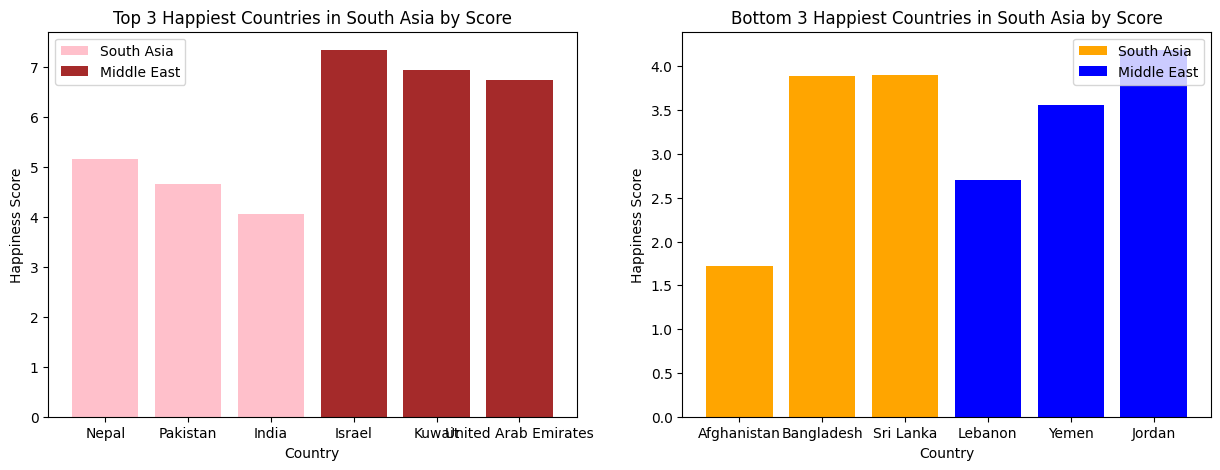

In [60]:
top3_south_asian = south_asian_filtered.nlargest(3, 'score')
bottom3_south_asian = south_asian_filtered.nsmallest(3, 'score')

top3_middle_eastern = middle_eastern_data.nlargest(3, 'score')
bottom3_middle_eastern = middle_eastern_data.nsmallest(3, 'score')
 #Top 3 Happiest:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.bar(top3_south_asian['Country name'], top3_south_asian['score'], color='pink', label='South Asia')
plt.bar(top3_middle_eastern['Country name'], top3_middle_eastern['score'], color='brown', label='Middle East')
plt.title('Top 3 Happiest Countries in South Asia by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.legend()

#Bottom 3 Happiest:
plt.subplot(1,2,2)
plt.bar(bottom3_south_asian['Country name'], bottom3_south_asian['score'], color='orange', label='South Asia')
plt.bar(bottom3_middle_eastern['Country name'], bottom3_middle_eastern['score'], color='blue', label='Middle East')
plt.title('Bottom 3 Happiest Countries in South Asia by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.legend()


3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

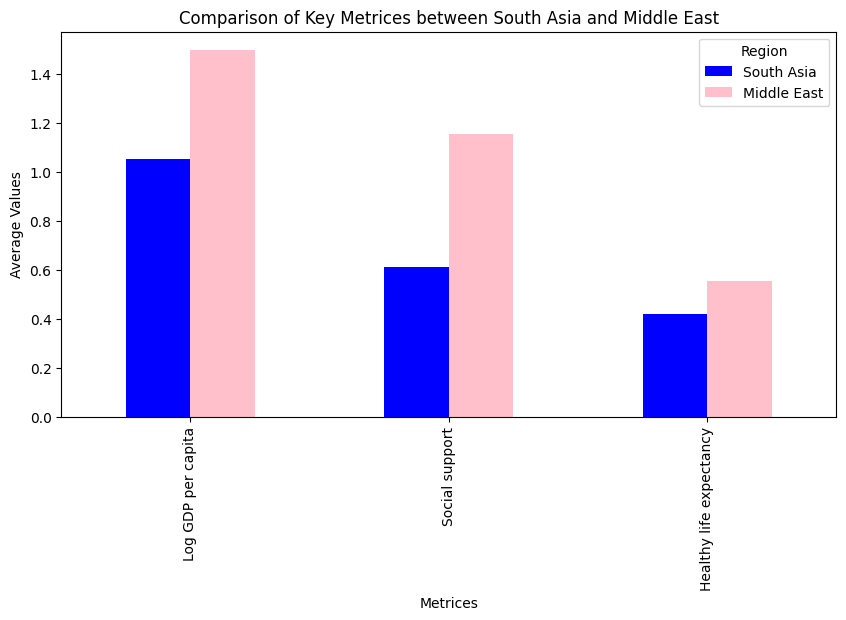

The metric with the largest disparity is Social support with a value of 0.54.


In [65]:
metrices = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asian_means = south_asian_filtered[metrices].mean()
middle_east_means = middle_eastern_data[metrices].mean()

compare_df= pd.DataFrame({
    'South Asia': south_asian_means,
    'Middle East': middle_east_means
})


compare_df.plot(kind='bar', figsize=(10,5), color=['blue', 'pink'])
#Set the title
plt.title('Comparison of Key Metrices between South Asia and Middle East')
#Set x and y labels respectively
plt.xlabel('Metrices')
plt.ylabel('Average Values')
#Add legend with a title
plt.legend(title='Region')
#Display the plot
plt.show()

#Calcuting which metrices show disparity between two regions
disparity = abs(compare_df['South Asia'] - compare_df['Middle East'])
#Identify the metric with the highest disparity
largest_disparity_metric = disparity.idxmax()
largest_disparity_value = disparity.max()
#Printing the result
print(f"The metric with the largest disparity is {largest_disparity_metric} with a value of {largest_disparity_value:.2f}.")

4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [68]:
def compute_disparity(data):
    range_ = data['score'].max() - data['score'].min()
    cv = data['score'].std() / data['score'].mean()
    return range_, cv

range_sa, cv_sa = compute_disparity(south_asian_filtered)
range_me, cv_me = compute_disparity(middle_eastern_data)

print(f"\nSouth Asia - Range: {range_sa}, CV: {cv_sa}")
print(f"Middle East - Range: {range_me}, CV: {cv_me}")

# Determine which region has greater variability
greater_variability = "South Asia" if cv_sa > cv_me else "Middle East"
print(f"Region with greater variability: {greater_variability}")



South Asia - Range: 3.4370000000000003, CV: 0.3021482883337427
Middle East - Range: 4.634, CV: 0.28938880812119405
Region with greater variability: South Asia


5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.


Correlation Analysis:
South Asia: {'Log GDP per capita': 0.583969319428558, 'Social support': 0.6974343971971296, 'Healthy life expectancy': 0.4615442007568599}
Middle East: {'Log GDP per capita': 0.8026378194626558, 'Social support': 0.778130249459693, 'Healthy life expectancy': 0.5660943514747497}


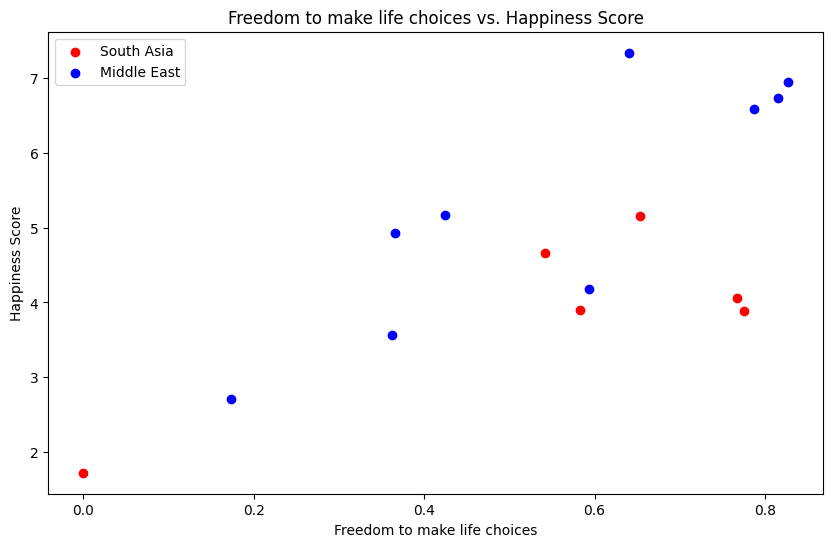

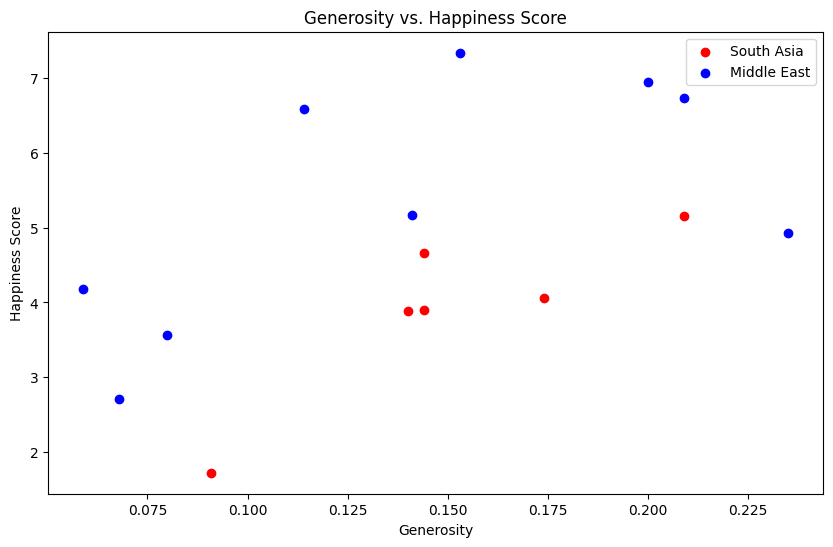

In [69]:
correlations_sa = {metric: south_asian_filtered[metric].corr(south_asian_filtered['score']) for metric in metrics}
correlations_me = {metric: middle_eastern_data[metric].corr(middle_eastern_data['score']) for metric in metrics}

print("\nCorrelation Analysis:")
print(f"South Asia: {correlations_sa}")
print(f"Middle East: {correlations_me}")

# Scatter plots with trendlines
for metric in ['Freedom to make life choices', 'Generosity']:
    plt.figure(figsize=(10, 6))
    plt.scatter(south_asian_filtered[metric], south_asian_filtered['score'], color='red', label='South Asia')
    plt.scatter(middle_eastern_data[metric], middle_eastern_data['score'], color='blue', label='Middle East')
    plt.title(f'{metric} vs. Happiness Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.legend()
    plt.show()

6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

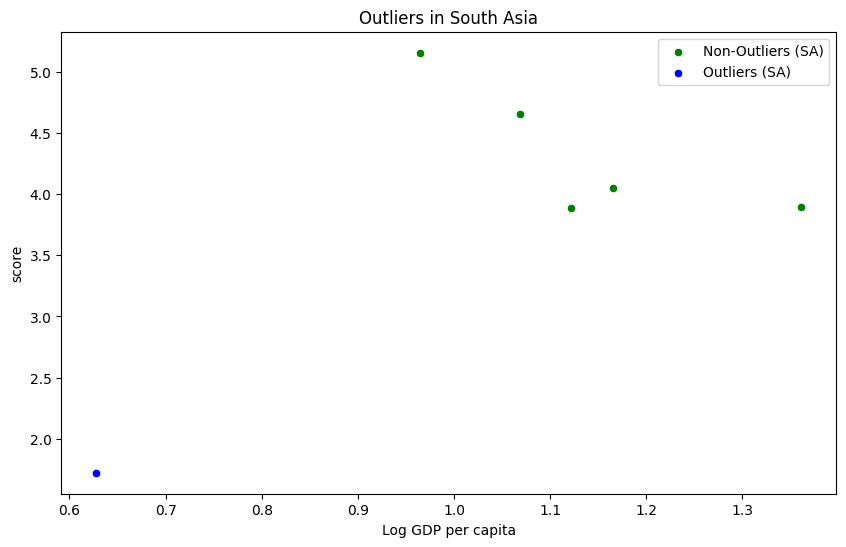

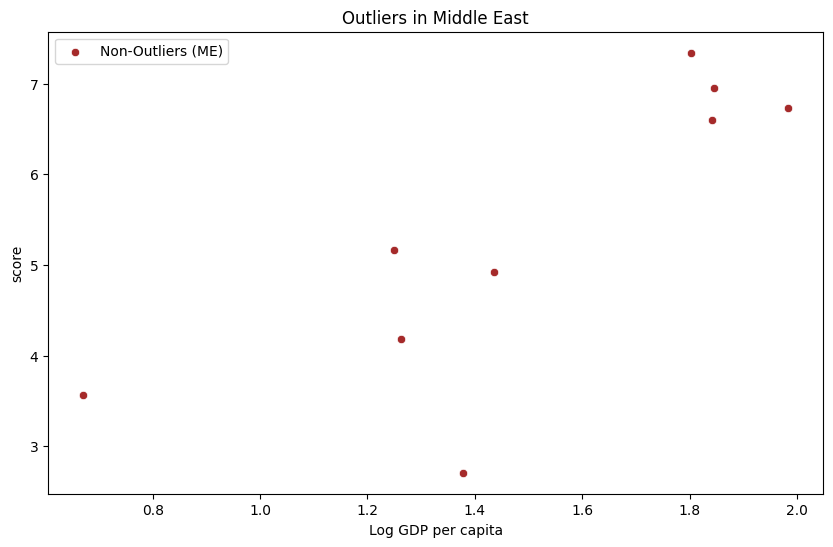

In [72]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    return outliers

outliers_sa = detect_outliers(south_asian_filtered, 'score')
outliers_me = detect_outliers(middle_eastern_data, 'score')

# Plot outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_filtered, label='Non-Outliers (SA)', color='green')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_sa, label='Outliers (SA)', color='blue')
plt.title('Outliers in South Asia')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_eastern_data, label='Non-Outliers (ME)', color='brown')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_me, label='Outliers (ME)', color='red')
plt.title('Outliers in Middle East')
plt.show()

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

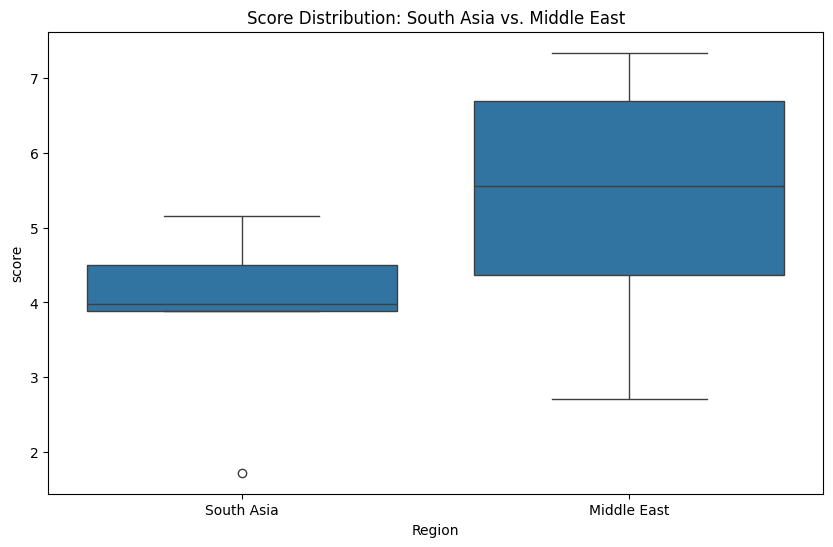

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    south_asian_filtered.assign(Region='South Asia'),
    middle_eastern_data.assign(Region='Middle East')
]))
plt.title('Score Distribution: South Asia vs. Middle East')
plt.show()